<a href="https://colab.research.google.com/github/cromcruach52/Snapfolia-Leaf-Detection-and-Classification/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import pipeline
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection
import requests
import skimage
import numpy as np
from PIL import Image
import torch
from PIL import ImageDraw

In [ ]:
checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [ ]:
model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

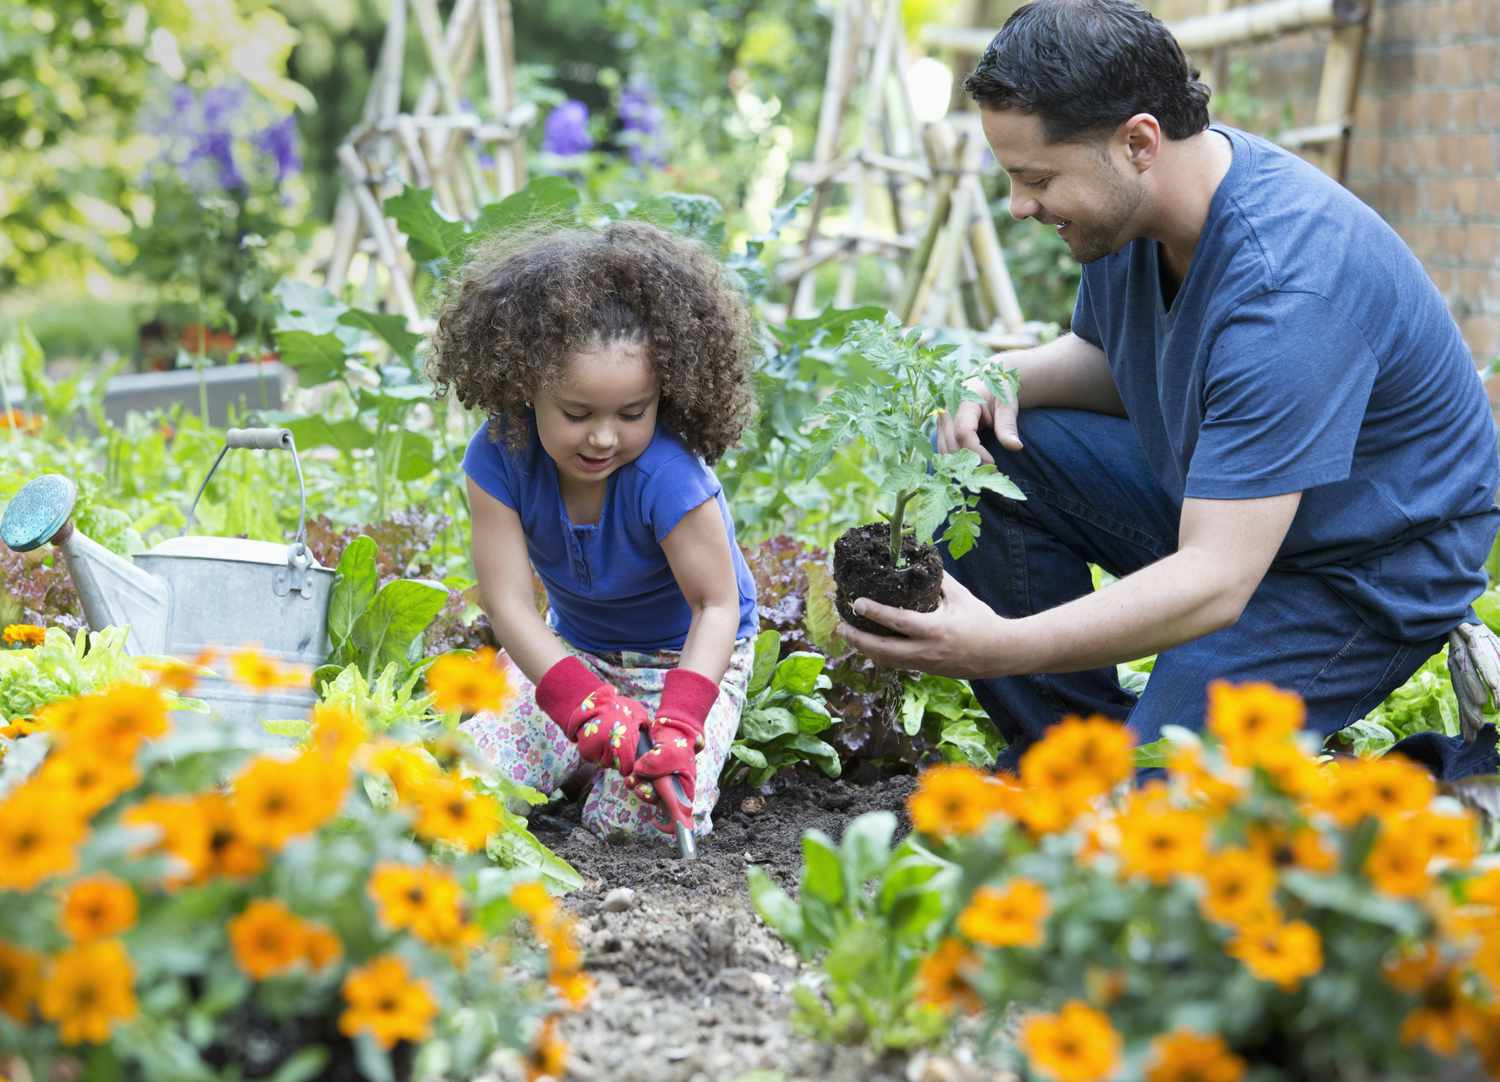

In [23]:
url = "https://www.verywellfamily.com/thmb/m4Gz5vPrFZ7s7pL-MTV1p6lS9Do=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/hispanic-father-and-daughter-gardening-together-463247401-58a390123df78c475830f5f5.jpg"
im = Image.open(requests.get(url, stream=True).raw)
im

In [26]:
text_queries = ["leaf", "black man", "black girl", "white man"]
inputs = processor(text=text_queries, images=im, return_tensors="pt")

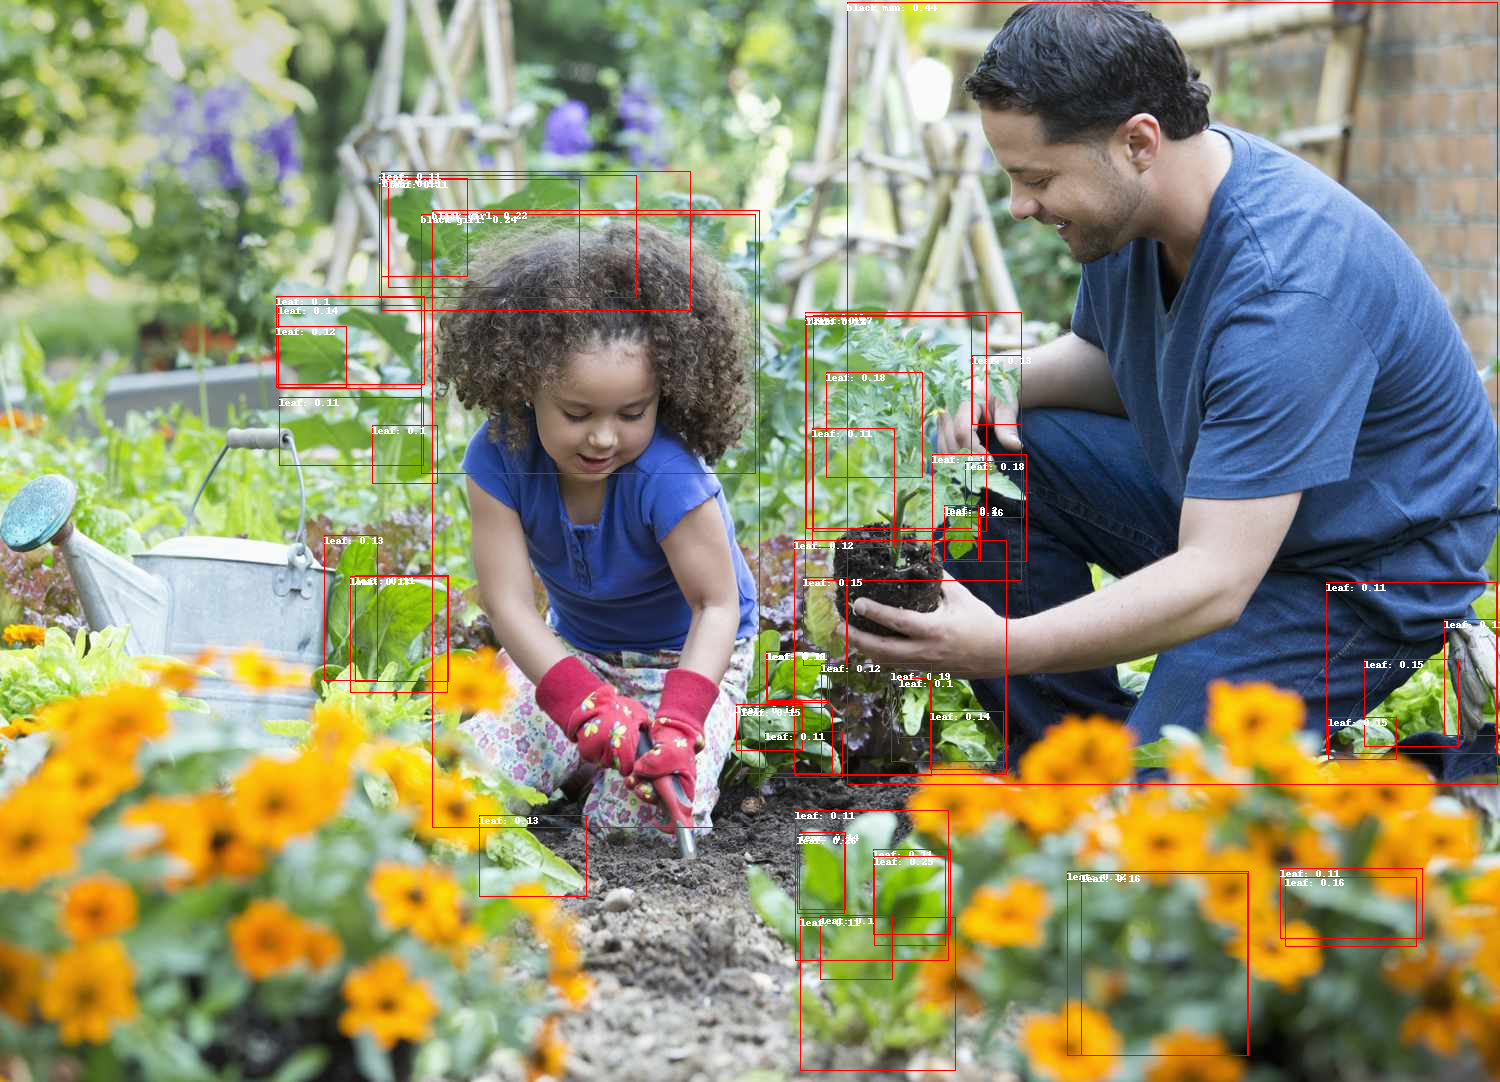

In [28]:
from PIL import ImageDraw, ImageFont

# Assuming `im` is your image and `text_queries` is a dictionary mapping labels to text
with torch.no_grad():
    outputs = model(**inputs)
    target_sizes = torch.tensor([im.size[::-1]])
    results = processor.post_process_object_detection(outputs, threshold=0.1, target_sizes=target_sizes)[0]

draw = ImageDraw.Draw(im)

# Load a font with a larger size (e.g., 20)
font_size = 80
try:
    # Try loading a truetype font (you can replace 'arial.ttf' with a path to a different font file if necessary)
    font = ImageFont.truetype("arial.ttf", font_size)
except IOError:
    # If the font file is not found, use the default PIL font with the specified size
    font = ImageFont.load_default()

scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()

for box, score, label in zip(boxes, scores, labels):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{text_queries[label]}: {round(score, 2)}", fill="white", font=font)

im